# COURSE: A deep understanding of deep learning
## SECTION: Math prerequisites
### LECTURE: The t-test
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# NEW!
import scipy.stats as stats # install using pip install scipy

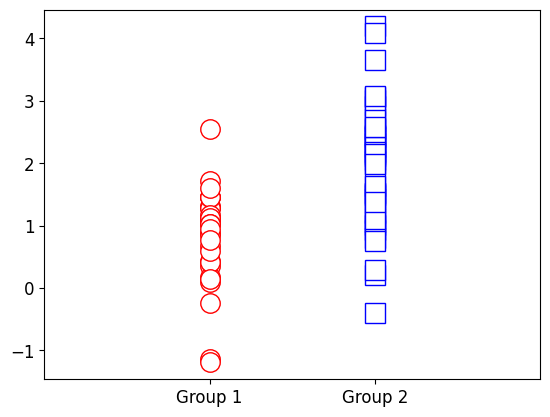

In [54]:
# parameters
n1 = 30   # samples in dataset 1
n2 = 40   # ...and 2
mu1 = 1   # population mean in dataset 1
mu2 = 2   # population mean in dataset 2

# generate the data
data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)



# plot them
plt.plot(np.zeros(n1),data1,'ro',markerfacecolor='w',markersize=14)
plt.plot(np.ones(n2), data2,'bs',markerfacecolor='w',markersize=14)
plt.xlim([-1,2])
plt.xticks([0,1],labels=['Group 1','Group 2'])
plt.show()

In [55]:
# t-test via stats package
d1mean = data1.mean()
d2mean = data2.mean()
d1var = data1.var()
d2var = data2.var()
stdev = np.sqrt((d1var/n1)+(d2var/n2))
tk=d1mean-d2mean/(stdev)
print('Group 1 mean: ', d1mean)
print('Group 2 mean: ', d2mean)
print('Group 1 variance: ', d1var)
print('Group 2 variance: ', d2var)
print('stdev = ',stdev)
print('tk = ',tk)
print('')
# _ind = independent samples
t,p = stats.ttest_ind(data1,data2)
print(t)
print(p)

Group 1 mean:  0.8126654205730767
Group 2 mean:  1.9738001672348873
Group 1 variance:  0.5906494092077773
Group 2 variance:  0.989923029489239
stdev =  0.21079940554349347
tk =  -8.55073938669352

-5.236477179779123
1.7301395702118158e-06


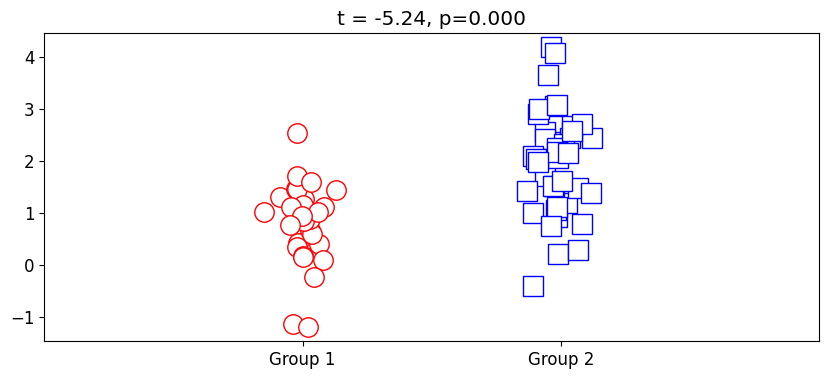

In [56]:
# common way to show t-test results in a plot
fig = plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size':12}) # change the font size

plt.plot(0+np.random.randn(n1)/15, data1, 'ro',markerfacecolor='w',markersize=14)
plt.plot(1+np.random.randn(n2)/15, data2, 'bs',markerfacecolor='w',markersize=14)
plt.xlim([-1,2])
plt.xticks([0,1],labels=['Group 1','Group 2'])

# set the title to include the t-value and p-value
plt.title(f't = {t:.2f}, p={p:.3f}')

plt.show()

### The independent samples t-test (Student's t-test) is based on the following assumptions and calculations:

1. **Null Hypothesis**: The null hypothesis ($H_0$) states that there is no significant difference between the means of the two populations from which the samples are drawn. Mathematically, $H_0: \mu_1 = \mu_2$.

2. **Alternative Hypothesis**: The alternative hypothesis ($H_1$) states that there is a significant difference between the means of the two populations. Mathematically, $H_1: \mu_1 \neq \mu_2$.

3. **Calculate Sample Means**: 
   - Let $\bar{X}_1$ be the mean of sample 1.
   - Let $\bar{X}_2$ be the mean of sample 2.

4. **Calculate Pooled Standard Deviation**:
   - The pooled standard deviation ($s_p$) is calculated as:
     $s_p = \sqrt{\frac{(n_1 - 1)s^2_1 + (n_2 - 1)s^2_2}{n_1 + n_2 - 2}}$
     where $n_1$ and $n_2$ are the sizes of sample 1 and sample 2, respectively, and $s^2_1$ and $s^2_2$ are their variances.

5. **Calculate Standard Error**:
   - The standard error (SE) of the difference between means is calculated as:
     $SE = s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}$

6. **Calculate t-statistic**:
   - The t-statistic ($t$) is calculated using the formula:
     $t = \frac{\bar{X}_1 - \bar{X}_2}{SE}$

7. **Determine Degrees of Freedom**:
   - The degrees of freedom (df) for the t-test are given by:
     $df = n_1 + n_2 - 2$

8. **Calculate p-value**:
   - The p-value is calculated using the cumulative distribution function (CDF) of the t-distribution with the calculated degrees of freedom, considering whether the test is two-tailed or one-tailed:
   
     $p\text{value} = 2 \times (1 - T.cdf(|t|, df)) \quad \text{(for a two-tailed test)}$
     where $T.cdf$ is the CDF of the t-distribution and $|t|$ denotes the absolute value of the t-statistic.

The function `stats.ttest_ind` returns both the t-statistic ($t$) and the p-value, which can be used to draw conclusions about whether there is a significant difference between the means of the two samples.

# T-Test Overview

A t-test is a statistical hypothesis test used to determine if there is a significant difference between the means of two groups. It is named after William Sealy Gosset, who published under the pseudonym "Student," and it was first introduced in 1908. The t-test assumes that the data follows a normal distribution and uses sample data to estimate population parameters.

## Types of T-Tests

### Independent Samples T-Test (Student's T-Test)
This test is used when you have two independent groups and want to compare their means. For example, comparing the average heights of students from two different schools or examining the effectiveness of two different teaching methods on student performance.

### Paired Samples T-Test (Dependent Samples T-Test)
This test is used when you have two related groups, such as before-and-after measurements on the same subjects or comparing the weights of the same set of objects before and after a treatment.

### One Sample T-Test
This test is used to determine if the mean of a single group is significantly different from a specified value (usually the population mean). For example, you might use this test to see if the average weight of apples produced by a new machine differs from the standard weight of 100 grams.

## Calculation of T-Statistic
The t-statistic is calculated using the formula:
$\ t = \frac{\bar{X}_1 - \bar{X}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $
where:
- $\ \bar{X}_1 $ and $\ \bar{X}_2 $ are the means of the two groups,
- $\ s_p $ is the pooled standard deviation,
- $\ n_1 $ and $\ n_2 $ are the sample sizes of the two groups.

## Comparison to Critical Value
The calculated t-statistic is then compared to a critical value from the t-distribution with degrees of freedom equal to the total number of observations minus the number of groups (for independent samples t-test) or minus one (for paired samples t-test). If the calculated t-statistic exceeds this critical value, we reject the null hypothesis and conclude that there is a statistically significant difference between the means of the two groups.

## Assumptions
The t-test has several assumptions, including:
1. Independence of observations,
2. Normality of data distribution,
3. Equal variances (in the case of independent samples t-test).

Violations of these assumptions can affect the validity of the results, and alternative tests like the Mann-Whitney U test or Welch's t-test may be more appropriate in such cases.
